# **INTEGRANTES - GRUPO LEADTECH**

- Bianca Leticia Roman Caldeira - RM: 552267 - Turma: 2TDSPH
- Charlene Aparecida Estevam Mendes Fialho - RM: 552252 - Turma: 2TDSPH
- Lais Alves da Silva Cruz - RM: 552258 - Turma: 2TDSPH
- Fabricio Torres Antonio - RM: 97916 - Turma: 2TDSPH


# **Análise de Crédito - Resolução**

> Utilização de deep analytics e machine learning para solução de um problema.

### ***Descrição :***
Neste notebook, apresentamos uma análise abrangente sobre os desafios enfrentados pela ABX Tecnologia no processo de análise de crédito de seus clientes. Abordamos questões como padronização da análise de crédito, classificação automática de clientes e automação da recomendação de crédito. Utilizamos técnicas de deep analytics e modelos de machine learning para propor soluções eficazes que visam melhorar a eficiência e a precisão da análise de crédito. Este notebook oferece insights valiosos e soluções práticas para aprimorar o processo de tomada de decisão da ABX Tecnologia no que diz respeito à concessão de crédito.

### ***Objetivos :***
1. Padronização da Análise de Crédito.
2. Classificação Automática de Clientes.
3. Automação da Recomendação de Crédito.

## ***Importação das bibliotecas***
Nesta seção, importamos as bibliotecas Python necessárias para realizar a análise.

In [61]:
# Importando a biblioteca pandas para manipulação e análise de dados
import pandas as pd

# Importando a biblioteca numpy para operações numéricas
import numpy as np

# Importando a biblioteca matplotlib.pyplot para visualização de gráficos
import matplotlib.pyplot as plt

# Importando a biblioteca seaborn para visualização estatística e aprimoramento dos gráficos
import seaborn as sns

# Importando a biblioteca MinMaxScaler do sklearn.preprocessing para escalonamento de dados
from sklearn.preprocessing import MinMaxScaler

# Importando a biblioteca LabelEncoder do sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder


## ***Carregamento dos Dados***

Nesta seção, carregamos os dados fornecidos.

In [62]:
# Adicionando url do dataset
url = '../dataset/solicitacoescredito.csv'

# Carregando o conjunto de dados do arquivo CSV para um DataFrame
df = pd.read_csv(url)

In [63]:
# Visualize as primeiras linhas do dataset
df.head()

,numero_solicitacao,razaoSocial,nomeFantasia,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,...,periodoDemonstrativoEmMeses,custos,anoFundacao,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,dataAprovadoNivelAnalista
0,1,James Richardson-Patel,Alexandra Williams,KEBE17609492220843,0,0.252448,0.0,2015-12-10T00:00:00,0,0.00,...,12.0,0.0,2003.0,Acima de 17 anos,90000.0,False,True,1.0,43200.0,2020-02-03T20:57:33
1,2,Dr. Geoffrey Walsh,Mr. Darren Arnold,JRBK88908250677300,0,0.000000,NaN,2019-06-12T17:28:31,0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2,3,Joanna Hudson,Dr. David Rees,GCVQ28531614261293,4,0.624777,0.0,2019-11-27T00:00:00,0,0.00,...,7.0,0.0,2014.0,De 6 a 10 anos,20000.0,False,True,1.0,4320.0,2020-02-04T16:40:49
3,4,Gordon Jones-Hopkins,Sara Reid-Robson,KJND32266018316396,20,0.000000,NaN,2017-02-13T17:20:27,0,0.00,...,12.0,0.0,2013.0,De 6 a 10 anos,30000.0,False,True,0.0,5920.0,2020-02-04T16:37:52
4,5,Nigel Lee,Dr. Stanley Duncan,CGQN15826802440348,20,0.454088,0.0,2010-07-13T00:00:00,20,1486.95,...,9.0,40680051.0,2002.0,Acima de 17 anos,75000.0,False,False,1.0,89000.0,2020-02-04T15:06:28


## ***Preparação e Análise Exploratória dos Dados***

Nesta seção, realizamos as etapas iniciais de preparação dos dados, incluindo a limpeza, transformação e análise exploratória.

###   Visualização de Estrutura e Distribuição

Neste tópico, examinamos a estrutura dos dados e a distribuição de suas características principais.

In [64]:
# Visualizando ultimas linhas
df.tail()

,numero_solicitacao,razaoSocial,nomeFantasia,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,...,periodoDemonstrativoEmMeses,custos,anoFundacao,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,dataAprovadoNivelAnalista
8968,9041,Leah Williams,Georgia Booth,YKGZ02907098931653,149,0.306580,0.0,2006-04-26T00:00:00,59,599964.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.990876,NaN,NaN
8969,9042,Mr. Jordan Stevens,Miss Ellie Kelly,UCBM91111020900951,23,0.329796,0.0,2016-08-03T00:00:00,0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.958869,NaN,NaN
8970,9043,Mr. Barry Wells,Danielle Hudson,CLDB61185288622179,3,0.383919,0.0,2018-10-25T00:00:00,4,2933.38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
8971,9044,Keith Jones,Steven Kennedy-Jones,BRJP37453437154592,11,0.424099,0.0,2011-08-10T00:00:00,31,559679.98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.994786,NaN,NaN
8972,9045,Cheryl Johnson,Chelsea Kay-Sinclair,COZD54939108010752,4,0.365041,0.0,2009-05-27T00:00:00,56,13640.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


In [65]:
# Vendo types
df.dtypes

numero_solicitacao               int64
razaoSocial                     object
nomeFantasia                    object
cnpjSemTraco                    object
maiorAtraso                      int64
margemBrutaAcumulada           float64
percentualProtestos            float64
primeiraCompra                  object
prazoMedioRecebimentoVendas      int64
titulosEmAberto                float64
valorSolicitado                float64
status                          object
definicaoRisco                  object
diferencaPercentualRisco       float64
percentualRisco                float64
dashboardCorrelacao            float64
valorAprovado                  float64
dataAprovadoEmComite            object
periodoBalanco                  object
ativoCirculante                float64
passivoCirculante              float64
totalAtivo                     float64
totalPatrimonioLiquido         float64
endividamento                  float64
duplicatasAReceber             float64
estoque                  

In [66]:
# Vendo tamanho
print(f"Linhas: {df.shape[0]} e Colunas: {df.shape[1]}")

Linhas: 8973 e Colunas: 38


In [67]:
# Total de elementos que contem no dataset
print("Número total de elementos:", df.size)


Número total de elementos: 340974


In [68]:
# Vendo informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8973 entries, 0 to 8972
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   numero_solicitacao           8973 non-null   int64  
 1   razaoSocial                  8973 non-null   object 
 2   nomeFantasia                 8973 non-null   object 
 3   cnpjSemTraco                 8973 non-null   object 
 4   maiorAtraso                  8973 non-null   int64  
 5   margemBrutaAcumulada         8973 non-null   float64
 6   percentualProtestos          7475 non-null   float64
 7   primeiraCompra               8867 non-null   object 
 8   prazoMedioRecebimentoVendas  8973 non-null   int64  
 9   titulosEmAberto              8973 non-null   float64
 10  valorSolicitado              8973 non-null   float64
 11  status                       8973 non-null   object 
 12  definicaoRisco               8973 non-null   object 
 13  diferencaPercentua

In [69]:
# Vendo dados descritivos
df.describe()

,numero_solicitacao,maiorAtraso,margemBrutaAcumulada,percentualProtestos,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,diferencaPercentualRisco,percentualRisco,dashboardCorrelacao,...,duplicatasAReceber,estoque,faturamentoBruto,margemBruta,periodoDemonstrativoEmMeses,custos,anoFundacao,capitalSocial,scorePontualidade,limiteEmpresaAnaliseCredito
count,8973.000000,8973.000000,8973.000000,7475.000000,8973.000000,8.973000e+03,8.973000e+03,8973.000000,8973.000000,8973.000000,...,4.733000e+03,4.733000e+03,8.223000e+03,8.223000e+03,8223.000000,8.223000e+03,8228.000000,8.228000e+03,8973.000000,8.228000e+03
mean,4550.042015,24.642594,0.362176,0.019260,23.083027,6.487101e+04,7.492436e+05,0.750321,0.249679,0.047236,...,1.663397e+07,1.523956e+07,5.597420e+07,1.620988e+07,10.377356,2.839061e+07,2006.027467,1.121453e+07,0.798346,2.851017e+06
std,2603.485853,66.180793,0.201455,0.593579,68.177649,2.482852e+05,2.261875e+07,0.146058,0.146058,0.472476,...,2.979029e+08,8.383792e+07,3.344357e+08,1.163482e+08,3.220965,2.072148e+08,19.424120,9.742853e+07,0.379186,2.672324e+07
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+02,0.207547,0.000000,-0.999990,...,-2.278071e+07,-2.632260e+05,0.000000e+00,-6.148721e+08,1.000000,-3.466338e+08,1000.000000,0.000000e+00,0.000000,0.000000e+00
25%,2316.000000,3.000000,0.281395,0.000000,0.000000,0.000000e+00,2.500000e+04,0.642857,0.142857,0.000000,...,3.920500e+04,1.712860e+05,1.191995e+06,0.000000e+00,11.000000,0.000000e+00,2000.000000,5.000000e+04,0.887479,7.360000e+03
50%,4559.000000,6.000000,0.402895,0.000000,0.000000,0.000000e+00,5.000000e+04,0.750000,0.250000,0.000000,...,1.088164e+06,1.063783e+06,3.599483e+06,0.000000e+00,12.000000,0.000000e+00,2009.000000,1.000000e+05,1.000000,4.860000e+04
75%,6802.000000,22.000000,0.507860,0.000000,30.000000,1.725000e+04,1.200000e+05,0.857143,0.357143,0.000000,...,6.576243e+06,5.493839e+06,1.584222e+07,3.357474e+06,12.000000,4.520907e+06,2015.000000,5.000000e+05,1.000000,3.450000e+05
max,9045.000000,1265.000000,1.000000,36.983728,1605.000000,3.938590e+06,1.500000e+09,1.000000,0.792453,0.999990,...,2.009358e+10,1.293428e+09,6.426115e+09,3.366843e+09,12.000000,4.393536e+09,2020.000000,4.100000e+09,1.000000,1.974261e+09


In [70]:
# Verificar a contagem de valores únicos em cada coluna
df.nunique()


numero_solicitacao             8973
razaoSocial                    2759
nomeFantasia                   2677
cnpjSemTraco                   2829
maiorAtraso                     175
margemBrutaAcumulada           2145
percentualProtestos              10
primeiraCompra                 1950
prazoMedioRecebimentoVendas     180
titulosEmAberto                 761
valorSolicitado                 363
status                            7
definicaoRisco                    4
diferencaPercentualRisco         79
percentualRisco                  81
dashboardCorrelacao             701
valorAprovado                   326
dataAprovadoEmComite            558
periodoBalanco                  124
ativoCirculante                1794
passivoCirculante              1789
totalAtivo                     1788
totalPatrimonioLiquido         1759
endividamento                  1185
duplicatasAReceber             1668
estoque                        1674
faturamentoBruto               4288
margemBruta                 

In [71]:
# Verificar contagem de elementos não nulos em cada coluna
print(df.count())

numero_solicitacao             8973
razaoSocial                    8973
nomeFantasia                   8973
cnpjSemTraco                   8973
maiorAtraso                    8973
margemBrutaAcumulada           8973
percentualProtestos            7475
primeiraCompra                 8867
prazoMedioRecebimentoVendas    8973
titulosEmAberto                8973
valorSolicitado                8973
status                         8973
definicaoRisco                 8973
diferencaPercentualRisco       8973
percentualRisco                8973
dashboardCorrelacao            8973
valorAprovado                  7569
dataAprovadoEmComite            558
periodoBalanco                 4733
ativoCirculante                4733
passivoCirculante              4733
totalAtivo                     4733
totalPatrimonioLiquido         4733
endividamento                  4733
duplicatasAReceber             4733
estoque                        4733
faturamentoBruto               8223
margemBruta                 

In [72]:
# Verificar valores ausentes
valores_ausentes = df.isna().sum()
print("Valores ausentes por coluna:")
print(valores_ausentes)

Valores ausentes por coluna:
numero_solicitacao                0
razaoSocial                       0
nomeFantasia                      0
cnpjSemTraco                      0
maiorAtraso                       0
margemBrutaAcumulada              0
percentualProtestos            1498
primeiraCompra                  106
prazoMedioRecebimentoVendas       0
titulosEmAberto                   0
valorSolicitado                   0
status                            0
definicaoRisco                    0
diferencaPercentualRisco          0
percentualRisco                   0
dashboardCorrelacao               0
valorAprovado                  1404
dataAprovadoEmComite           8415
periodoBalanco                 4240
ativoCirculante                4240
passivoCirculante              4240
totalAtivo                     4240
totalPatrimonioLiquido         4240
endividamento                  4240
duplicatasAReceber             4240
estoque                        4240
faturamentoBruto                750

In [73]:
# Verificar valores nulos
valores_nulos = df.isnull().sum()
print("Valores nulos por coluna:")
print(valores_nulos)

Valores nulos por coluna:
numero_solicitacao                0
razaoSocial                       0
nomeFantasia                      0
cnpjSemTraco                      0
maiorAtraso                       0
margemBrutaAcumulada              0
percentualProtestos            1498
primeiraCompra                  106
prazoMedioRecebimentoVendas       0
titulosEmAberto                   0
valorSolicitado                   0
status                            0
definicaoRisco                    0
diferencaPercentualRisco          0
percentualRisco                   0
dashboardCorrelacao               0
valorAprovado                  1404
dataAprovadoEmComite           8415
periodoBalanco                 4240
ativoCirculante                4240
passivoCirculante              4240
totalAtivo                     4240
totalPatrimonioLiquido         4240
endividamento                  4240
duplicatasAReceber             4240
estoque                        4240
faturamentoBruto                750
ma

In [74]:
# Verificar valores iguais a zero
valores_zero = (df == 0).sum()
print("\nValores iguais a zero por coluna:")
print(valores_zero)


Valores iguais a zero por coluna:
numero_solicitacao                0
razaoSocial                       0
nomeFantasia                      0
cnpjSemTraco                      0
maiorAtraso                    1756
margemBrutaAcumulada           1577
percentualProtestos            7452
primeiraCompra                    0
prazoMedioRecebimentoVendas    5536
titulosEmAberto                5042
valorSolicitado                   0
status                            0
definicaoRisco                    0
diferencaPercentualRisco          0
percentualRisco                 761
dashboardCorrelacao            5587
valorAprovado                     4
dataAprovadoEmComite              0
periodoBalanco                    0
ativoCirculante                 554
passivoCirculante               591
totalAtivo                      557
totalPatrimonioLiquido          590
endividamento                  2381
duplicatasAReceber             1029
estoque                         763
faturamentoBruto             

In [75]:
df['valorAprovado']

0       50000.0
1           NaN
2       20000.0
3       15000.0
4       50000.0
         ...   
8968        NaN
8969        NaN
8970        NaN
8971        NaN
8972        NaN
Name: valorAprovado, Length: 8973, dtype: float64

### *Pré-processamento dos Dados*

Realizamos as etapas de pré-processamento necessárias para preparar os dados para modelagem, incluindo tratamento de valores ausentes, codificação de variáveis categóricas, normalização ou padronização de variáveis numéricas, entre outros.

In [76]:
# dropando colunas desnecessárias presentes no dataset
sub_df = df.drop(['numero_solicitacao', 'razaoSocial', 'nomeFantasia', 'diferencaPercentualRisco', 'dashboardCorrelacao', 'dataAprovadoEmComite', 'dataAprovadoNivelAnalista', 'periodoBalanco', 'anoFundacao'], axis=1)

In [77]:
# Gera dados faltante no dataset
for col in sub_df.columns[:-1]:
    sub_df.loc[np.random.choice(sub_df.index, 5), col] = np.nan

In [78]:
# Definir opção para evitar avisos sobre downcasting
pd.set_option('future.no_silent_downcasting', True)

# Tratamento de valores nulos
sub_df.fillna(sub_df.mode().iloc[0], inplace=True)

In [79]:
# trocando o valor da coluna primeiraCompra para apenas o ano da primeira compra
sub_df['primeiraCompra'] = pd.to_datetime(sub_df['primeiraCompra'], errors='coerce').dt.year

In [80]:
sub_df.isnull().sum()

cnpjSemTraco                   0
maiorAtraso                    0
margemBrutaAcumulada           0
percentualProtestos            0
primeiraCompra                 5
prazoMedioRecebimentoVendas    0
titulosEmAberto                0
valorSolicitado                0
status                         0
definicaoRisco                 0
percentualRisco                0
valorAprovado                  0
ativoCirculante                0
passivoCirculante              0
totalAtivo                     0
totalPatrimonioLiquido         0
endividamento                  0
duplicatasAReceber             0
estoque                        0
faturamentoBruto               0
margemBruta                    0
periodoDemonstrativoEmMeses    0
custos                         0
intervaloFundacao              0
capitalSocial                  0
restricoes                     0
empresa_MeEppMei               0
scorePontualidade              0
limiteEmpresaAnaliseCredito    0
dtype: int64

In [81]:
# Convertendo os valores booleanos para números (1 para True, 0 para False)
sub_df['restricoes'] = sub_df['restricoes'].astype(float)

In [82]:
# trocando a coluna intervaloFundacao para valores de 0 a 6 de acordo com seu valor
definindo = {
    'De 0 a 5 anos': 0.0,
    'De 6 a 10 anos': 1.0,
    'De 11 a 16 anos': 2.0,
    'Acima de 17 anos': 3.0,
}

# Aplicar o mapeamento à coluna 'intervaloFundacao'
sub_df['intervaloFundacao'] = sub_df['intervaloFundacao'].replace(definindo)

sub_df['intervaloFundacao'] = sub_df['intervaloFundacao'].astype(float)

# Exibir os valores únicos após a transformação
sub_df['intervaloFundacao'].unique()

array([3., 1., 2., 0.])

In [83]:
# criando uma nova coluna solicitacao_duplas para verificar se o cnpj aparece mais de uma vez no dataset
sub_df['solicitacao_duplas'] = sub_df.duplicated(subset=['cnpjSemTraco'], keep=False)

# Convertendo os valores booleanos para números (1 para True, 0 para False)
sub_df['solicitacao_duplas'] = sub_df['solicitacao_duplas'].astype(float)

In [84]:
sub_df.shape

(8973, 30)

In [85]:
sub_df.head(20)

,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,status,definicaoRisco,...,margemBruta,periodoDemonstrativoEmMeses,custos,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,solicitacao_duplas
0,KEBE17609492220843,0.0,0.252448,0.0,2015.0,0.0,0.00,50000.0,AprovadoAnalista,De 11 a 30 % - Baixo,...,0.0,12.0,0.0,3.0,90000.0,0.0,True,1.000000,43200.0,1.0
1,JRBK88908250677300,0.0,0.000000,0.0,2019.0,0.0,0.00,10000.0,DocumentacaoReprovada,De 0 a 10 % - Muito Baixo,...,0.0,12.0,0.0,3.0,100000.0,0.0,False,0.000000,0.0,0.0
2,GCVQ28531614261293,4.0,0.624777,0.0,2019.0,0.0,0.00,20000.0,AprovadoAnalista,De 11 a 30 % - Baixo,...,0.0,7.0,0.0,1.0,20000.0,0.0,True,1.000000,4320.0,1.0
3,KJND32266018316396,20.0,0.000000,0.0,2017.0,0.0,0.00,25000.0,AprovadoAnalista,De 51 a 80 % - Alto,...,0.0,12.0,0.0,1.0,30000.0,0.0,True,0.000000,5920.0,1.0
4,CGQN15826802440348,20.0,0.454088,0.0,2010.0,20.0,1486.95,50000.0,AprovadoAnalista,De 11 a 30 % - Baixo,...,81459809.0,9.0,40680051.0,3.0,75000.0,0.0,False,1.000000,89000.0,1.0
5,KAYS53232027306925,0.0,0.000000,0.0,2019.0,0.0,0.00,25000.0,AprovadoAnalista,De 31 a 50 % - Médio,...,0.0,12.0,0.0,1.0,15000.0,0.0,True,0.000000,38400.0,1.0
6,PYOL43118620147076,16.0,0.000000,0.0,2011.0,0.0,0.00,100000.0,AprovadoAnalista,De 31 a 50 % - Médio,...,-7540544.0,12.0,156394112.0,3.0,30515674.0,1.0,False,0.000000,18132588.0,1.0
7,NLUX93496216176463,4.0,0.350175,0.0,2007.0,102.0,208980.00,300000.0,AprovadoAnalista,De 0 a 10 % - Muito Baixo,...,9357949.0,9.0,0.0,3.0,120000.0,0.0,False,1.000000,768233.0,1.0
8,LOVL82962402474134,43.0,0.245818,0.0,2006.0,27.0,6432.00,400000.0,AprovadoAnalista,De 11 a 30 % - Baixo,...,6233236.0,12.0,-49267738.0,3.0,1000000.0,0.0,False,1.000000,6910219.0,1.0
9,NXKJ36775578171965,24.0,0.000012,0.0,2011.0,0.0,22733.33,50000.0,DocumentacaoReprovada,De 0 a 10 % - Muito Baixo,...,0.0,12.0,0.0,3.0,100000.0,0.0,False,0.831590,0.0,1.0


In [86]:
# Selecionar colunas que contêm tipos de dados de string (object)
string_columns = sub_df.select_dtypes(include=['object']).columns
print(string_columns)


Index(['cnpjSemTraco', 'status', 'definicaoRisco', 'empresa_MeEppMei'], dtype='object')


### *Análise de Agrupamento*

Neste tópico, vamos abordar a análise de agrupamento de variáveis é uma técnica exploratória usada para identificar padrões e relacionamentos entre as variáveis em um conjunto de dados.

In [87]:
# Definição das faixas para análise de agrupamento
faixas_faturamento = [0, 5000000, 50000000, float('inf')]
faixas_margem_bruta = [0, 0.2, 0.4, 0.6, 0.8, 1, float('inf')]
faixas_ativo_total = [500000, 2000000, 20000000, 200000000, float('inf')]
rotulos_tamanhos = ['Média Empresa', 'Grande Empresa', 'Corporação']

In [88]:
# Definição dos pesos
pesos = {'faturamentoBruto': 0.5, 'margemBruta': 0.3, 'totalAtivo': 0.2}

# Inicialize o scaler
scaler = MinMaxScaler()

# Ajustando e transformando os dados das 3 colunas
sub_df[['faturamentoBruto', 'margemBruta', 'totalAtivo']]

# Cálculo do score composto ponderado
sub_df['score_ponderado'] = (sub_df['faturamentoBruto'] * pesos['faturamentoBruto'] +
                             sub_df['margemBruta'] * pesos['margemBruta'] +
                             sub_df['totalAtivo'] * pesos['totalAtivo'])

# Ajuste e transforme os dados do score ponderado
sub_df['score_ponderado'] = scaler.fit_transform(sub_df[['score_ponderado']])



In [89]:
# Adicionando um cálculo em cima do score composto usando uma função logarítmica
# sub_df['score_composto_modificado'] = np.log(sub_df['score_ponderado'] + 1)

# Definição dos Grupos de Tamanho de Empresa com base no score composto ponderado
faixas_score_ponderado = [0, 0.3, 0.6, 1]
rotulos_tamanho_empresa = ['Média Empresa', 'Grande Empresa', 'Corporação']
sub_df['Tamanho da Empresa'] = pd.cut(sub_df['score_ponderado'], bins=faixas_score_ponderado, labels=rotulos_tamanho_empresa, right=False)

In [90]:
# Criando coluna 'Tamanho da Empresa' com base na flag empresa_MeEppMei e nas faixas de faturamento
sub_df['Tamanho da Empresa'] = np.where(sub_df['empresa_MeEppMei'], 'MEI / ME / EPP', 
                                        pd.cut(sub_df['faturamentoBruto'], bins=faixas_faturamento, 
                                               labels=rotulos_tamanhos, right=False))

In [91]:
# Cria um dicionário para mapear faixas de porcentagem para categorias mais amplas
mapeamento = {
    'De 0 a 10 % - Muito Baixo': 'Muito Baixo',
    'De 11 a 30 % - Baixo': 'Baixo',
    'De 31 a 50 % - Médio': 'Médio',
    'De 51 a 80 % - Alto': 'Alto'
}

# Aplica o mapeamento à coluna 'definicaoRisco' para criar uma nova coluna 'risco_ampliado'
sub_df['risco_ampliado'] = sub_df['definicaoRisco'].map(mapeamento)

# Exibe os valores únicos na nova coluna 'risco_ampliado'
print(sub_df['risco_ampliado'].unique())


['Baixo' 'Muito Baixo' 'Alto' 'Médio']


In [92]:
# Substitui os valores na coluna 'status' pelos valores das categorias mais amplas
sub_df['status_objetivo'] = sub_df['status'].replace({
    'AprovadoAnalista': 'Aprovado', 
    'AprovadoComite': 'Aprovado', 
    'AguardandoAprovacao': 'Pendente', 
    'DocumentacaoReprovada': 'Reprovado', 
    'EmAnaliseDocumentacao': 'Pendente', 
    'ReprovadoAnalista': 'Reprovado', 
    'ReprovadoComite': 'Reprovado'
})

# Exibe os valores únicos da coluna 'status' após a substituição
print(sub_df['status_objetivo'].unique())

['Aprovado' 'Reprovado' 'Pendente']


In [93]:
# Verificando as primeiras linhas do DataFrame
sub_df.head(15)

,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,status,definicaoRisco,...,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,solicitacao_duplas,score_ponderado,Tamanho da Empresa,risco_ampliado,status_objetivo
0,KEBE17609492220843,0.0,0.252448,0.0,2015.0,0.0,0.00,50000.0,AprovadoAnalista,De 11 a 30 % - Baixo,...,90000.0,0.0,True,1.00000,43200.0,1.0,0.005587,MEI / ME / EPP,Baixo,Aprovado
1,JRBK88908250677300,0.0,0.000000,0.0,2019.0,0.0,0.00,10000.0,DocumentacaoReprovada,De 0 a 10 % - Muito Baixo,...,100000.0,0.0,False,0.00000,0.0,0.0,0.005521,Média Empresa,Muito Baixo,Reprovado
2,GCVQ28531614261293,4.0,0.624777,0.0,2019.0,0.0,0.00,20000.0,AprovadoAnalista,De 11 a 30 % - Baixo,...,20000.0,0.0,True,1.00000,4320.0,1.0,0.005627,MEI / ME / EPP,Baixo,Aprovado
3,KJND32266018316396,20.0,0.000000,0.0,2017.0,0.0,0.00,25000.0,AprovadoAnalista,De 51 a 80 % - Alto,...,30000.0,0.0,True,0.00000,5920.0,1.0,0.005569,MEI / ME / EPP,Alto,Aprovado
4,CGQN15826802440348,20.0,0.454088,0.0,2010.0,20.0,1486.95,50000.0,AprovadoAnalista,De 11 a 30 % - Baixo,...,75000.0,0.0,False,1.00000,89000.0,1.0,0.009288,Grande Empresa,Baixo,Aprovado
5,KAYS53232027306925,0.0,0.000000,0.0,2019.0,0.0,0.00,25000.0,AprovadoAnalista,De 31 a 50 % - Médio,...,15000.0,0.0,True,0.00000,38400.0,1.0,0.005555,MEI / ME / EPP,Médio,Aprovado
6,PYOL43118620147076,16.0,0.000000,0.0,2011.0,0.0,0.00,100000.0,AprovadoAnalista,De 31 a 50 % - Médio,...,30515674.0,1.0,False,0.00000,18132588.0,1.0,0.014356,Corporação,Médio,Aprovado
7,NLUX93496216176463,4.0,0.350175,0.0,2007.0,102.0,208980.00,300000.0,AprovadoAnalista,De 0 a 10 % - Muito Baixo,...,120000.0,0.0,False,1.00000,768233.0,1.0,0.006475,Grande Empresa,Muito Baixo,Aprovado
8,LOVL82962402474134,43.0,0.245818,0.0,2006.0,27.0,6432.00,400000.0,AprovadoAnalista,De 11 a 30 % - Baixo,...,1000000.0,0.0,False,1.00000,6910219.0,1.0,0.008987,Corporação,Baixo,Aprovado
9,NXKJ36775578171965,24.0,0.000012,0.0,2011.0,0.0,22733.33,50000.0,DocumentacaoReprovada,De 0 a 10 % - Muito Baixo,...,100000.0,0.0,False,0.83159,0.0,1.0,0.005521,Média Empresa,Muito Baixo,Reprovado


In [94]:
sub_df['Tamanho da Empresa'].isnull().sum()

0

### *Análise Gráfica - Distribuição de Variáveis*

Neste tópico, vamos explorar a análise gráfica para entender a estrutura e a distribuição dos dados. 
- *Obs. Os gráficos nos ajudam a identificar padrões, tendências e discrepâncias nos dados, fornecendo insights valiosos para análises mais aprofundadas. Vamos examinar os gráficos das variáveis numéricas para compreender melhor seus padrões e comportamentos.*

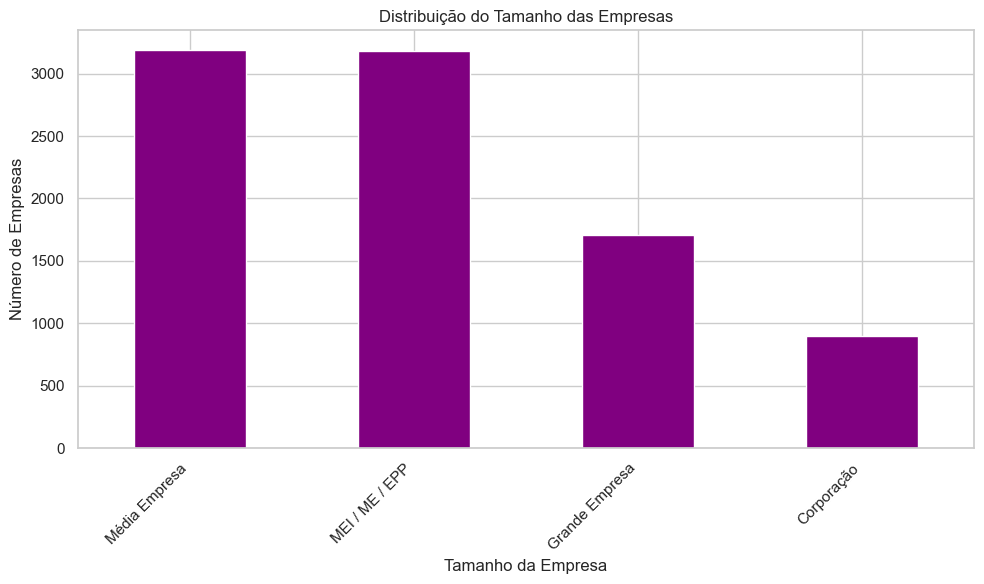

In [95]:
# Distribuição da quantidade de empresas se baseando no seu tamanho
tamanho_empresas = sub_df['Tamanho da Empresa'].value_counts()

plt.figure(figsize=(10, 6))
tamanho_empresas.plot(kind='bar', color='purple')
plt.title('Distribuição do Tamanho das Empresas')
plt.xlabel('Tamanho da Empresa')
plt.ylabel('Número de Empresas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

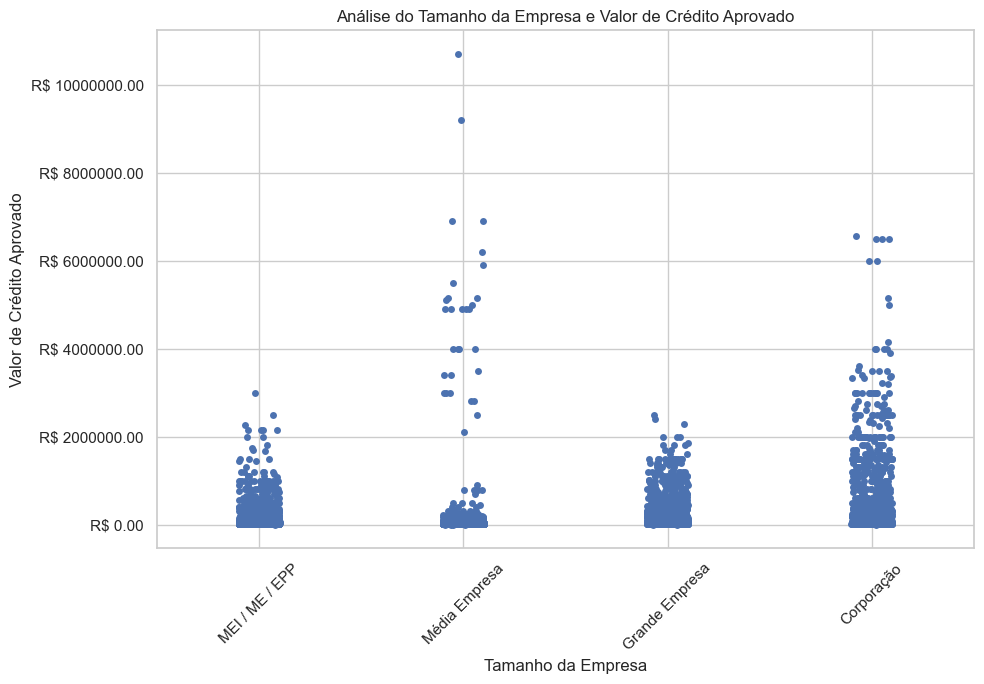

In [96]:
# Análise do tamanho da empresa e o valor de crédito aprovado

import matplotlib.ticker as ticker

plt.figure(figsize=(10, 7))
sns.stripplot(x='Tamanho da Empresa', y='valorAprovado', data=sub_df, jitter=True)
plt.title('Análise do Tamanho da Empresa e Valor de Crédito Aprovado')
plt.xlabel('Tamanho da Empresa')
plt.ylabel('Valor de Crédito Aprovado')
plt.xticks(rotation=45)
plt.grid(True)

# Formatando os rótulos do eixo y em reais
formatter = ticker.FormatStrFormatter('R$ %.2f')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

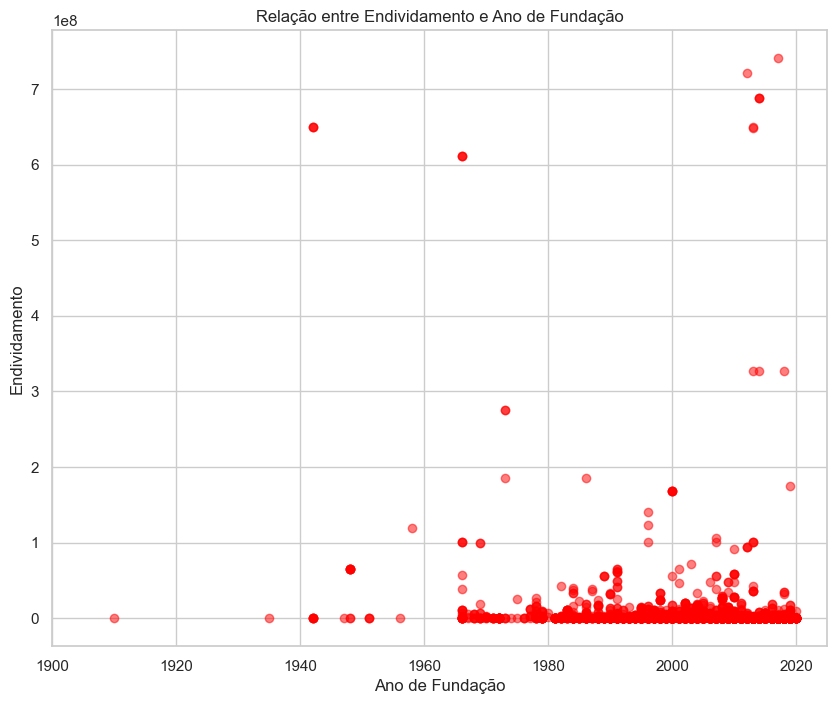

In [97]:
# endividamento com relação ao ano de fundação da empresa. 
# Isso irá ajudar a identificar se existe alguma relação entre o endividamento e o tempo de existência da empresa.

plt.figure(figsize=(10, 8))
plt.scatter(df['anoFundacao'], df['endividamento'], color='red', alpha=0.5)
plt.title('Relação entre Endividamento e Ano de Fundação')
plt.xlabel('Ano de Fundação')
plt.ylabel('Endividamento')
plt.xlim(1900, 2025) 
plt.grid(True)
plt.show()

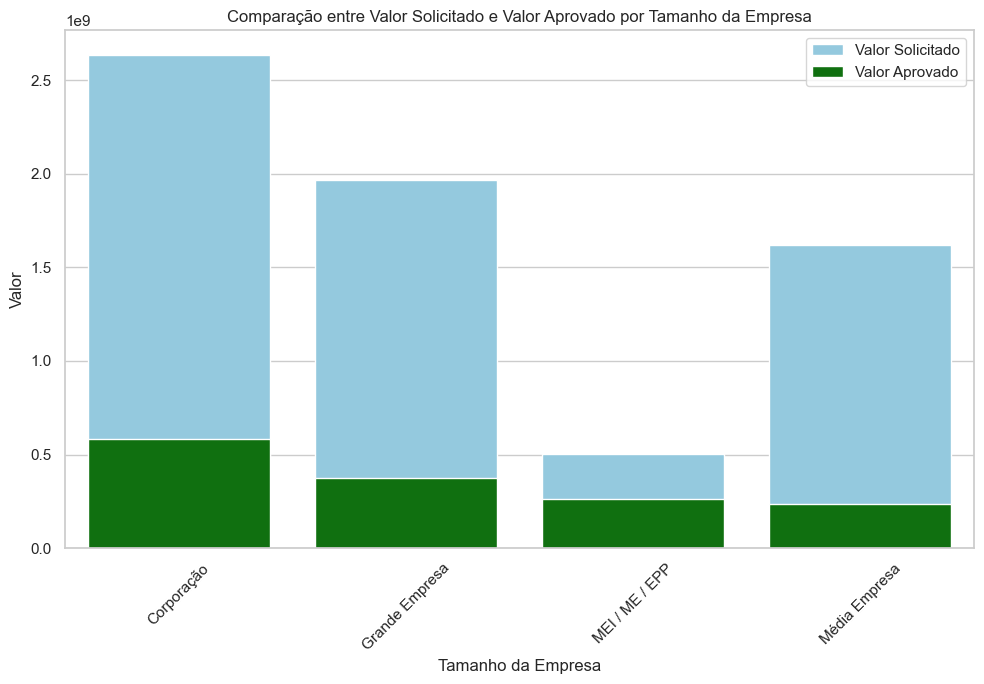

In [98]:
# valor de crédito solicitado em relação ao valor aprovado

stacked_df = sub_df.groupby('Tamanho da Empresa', observed=False).agg({'valorSolicitado': 'sum', 'valorAprovado': 'sum'}).reset_index()


plt.figure(figsize=(10, 7))

sns.barplot(x='Tamanho da Empresa', y='valorSolicitado', data=stacked_df, color='skyblue', label='Valor Solicitado')
sns.barplot(x='Tamanho da Empresa', y='valorAprovado', data=stacked_df, color='green', label='Valor Aprovado')

plt.title('Comparação entre Valor Solicitado e Valor Aprovado por Tamanho da Empresa')
plt.xlabel('Tamanho da Empresa')
plt.ylabel('Valor')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

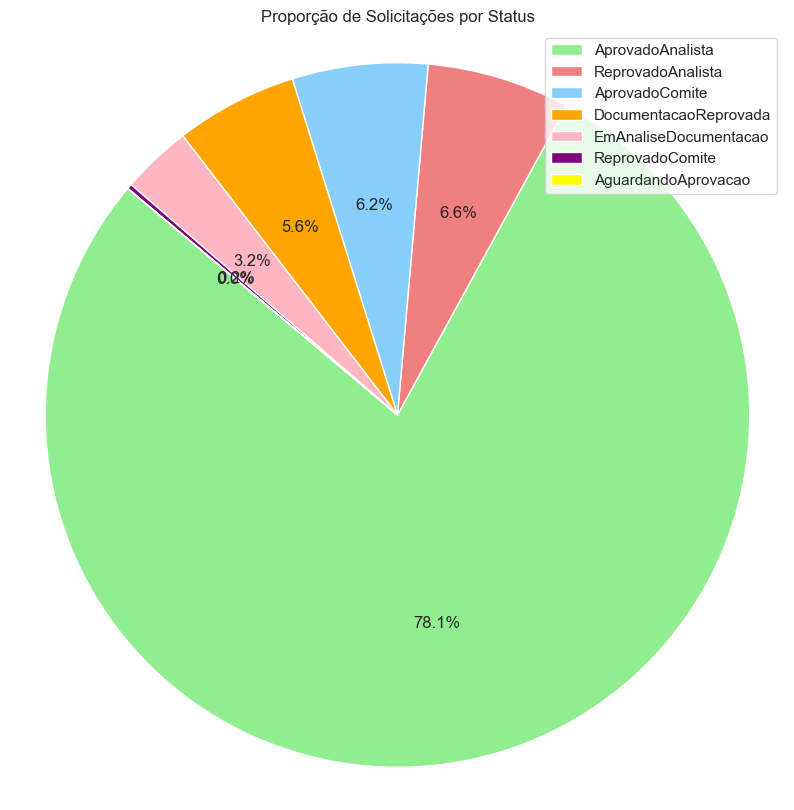

In [99]:
# proporção de solicitações aprovadas, reprovadas e em espera.

status_counts = sub_df['status'].value_counts()

labels = status_counts.index
sizes = status_counts.values
colors = ['lightgreen', 'lightcoral', 'lightskyblue', 'orange', 'lightpink', 'purple', 'yellow']

plt.figure(figsize=(10, 10))
plt.pie(sizes, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proporção de Solicitações por Status')
plt.axis('equal') 
plt.legend(labels, loc='upper right')
plt.show()




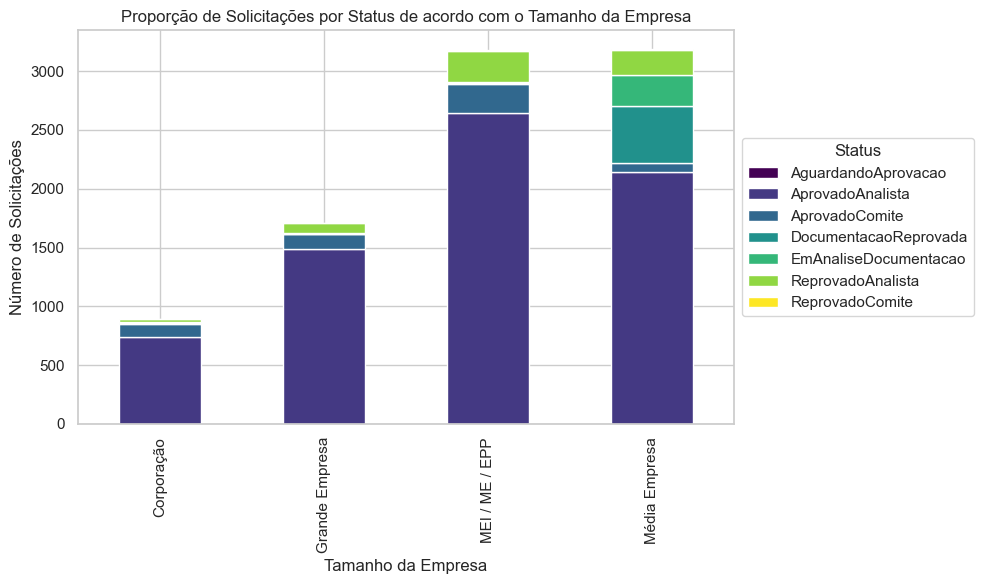

In [100]:
status_by_size = sub_df.groupby(['Tamanho da Empresa', 'status'], observed=False).size().unstack(fill_value=0)

status_by_size.plot(kind='bar', stacked=True, figsize=(10, 6), cmap='viridis')

sns.set_theme(style="whitegrid")

plt.title('Proporção de Solicitações por Status de acordo com o Tamanho da Empresa')
plt.xlabel('Tamanho da Empresa')
plt.ylabel('Número de Solicitações')
plt.legend(title='Status', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

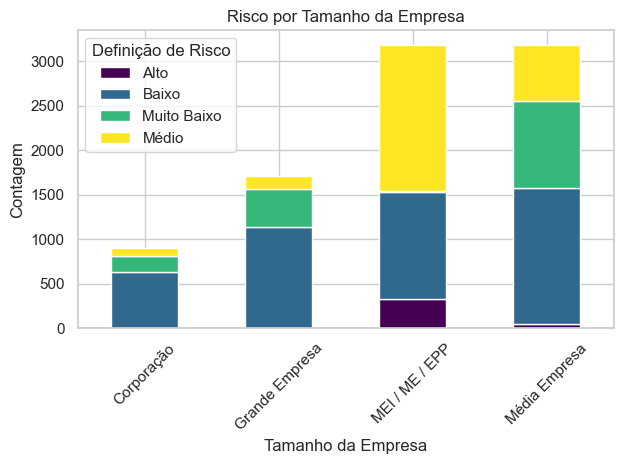

In [101]:
# Agrupamento por tamanho da empresa e contagem dos diferentes níveis de risco
agrupamento_risco_tamanho = sub_df.groupby(['Tamanho da Empresa', 'risco_ampliado']).size().unstack(fill_value=0)

# Criar o gráfico de barras agrupadas
plt.figure(figsize=(10, 6))
agrupamento_risco_tamanho.plot(kind='bar', stacked=True, cmap='viridis')
plt.title('Risco por Tamanho da Empresa')
plt.xlabel('Tamanho da Empresa')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.legend(title='Definição de Risco')
plt.tight_layout()
plt.show()


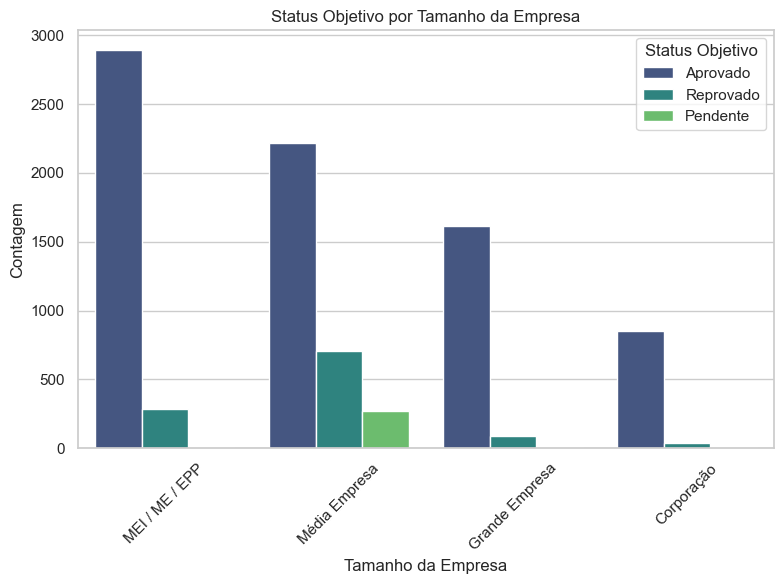

In [102]:
# Criar um gráfico de barras empilhadas
plt.figure(figsize=(8, 6))
sns.countplot(data=sub_df, x='Tamanho da Empresa', hue='status_objetivo', palette='viridis')
plt.title('Status Objetivo por Tamanho da Empresa')
plt.xlabel('Tamanho da Empresa')
plt.ylabel('Contagem')
plt.legend(title='Status Objetivo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


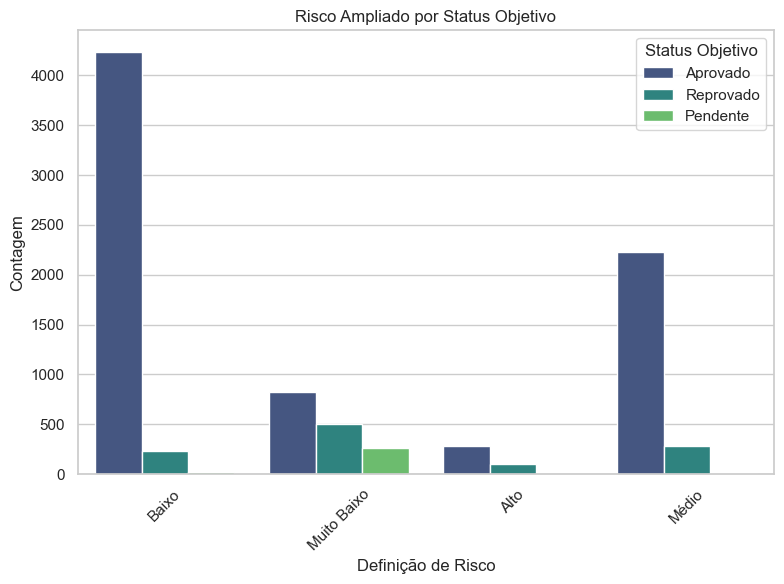

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar um gráfico de barras empilhadas
plt.figure(figsize=(8, 6))
sns.countplot(data=sub_df, x='risco_ampliado', hue='status_objetivo', palette='viridis')
plt.title('Risco Ampliado por Status Objetivo')
plt.xlabel('Definição de Risco')
plt.ylabel('Contagem')
plt.legend(title='Status Objetivo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

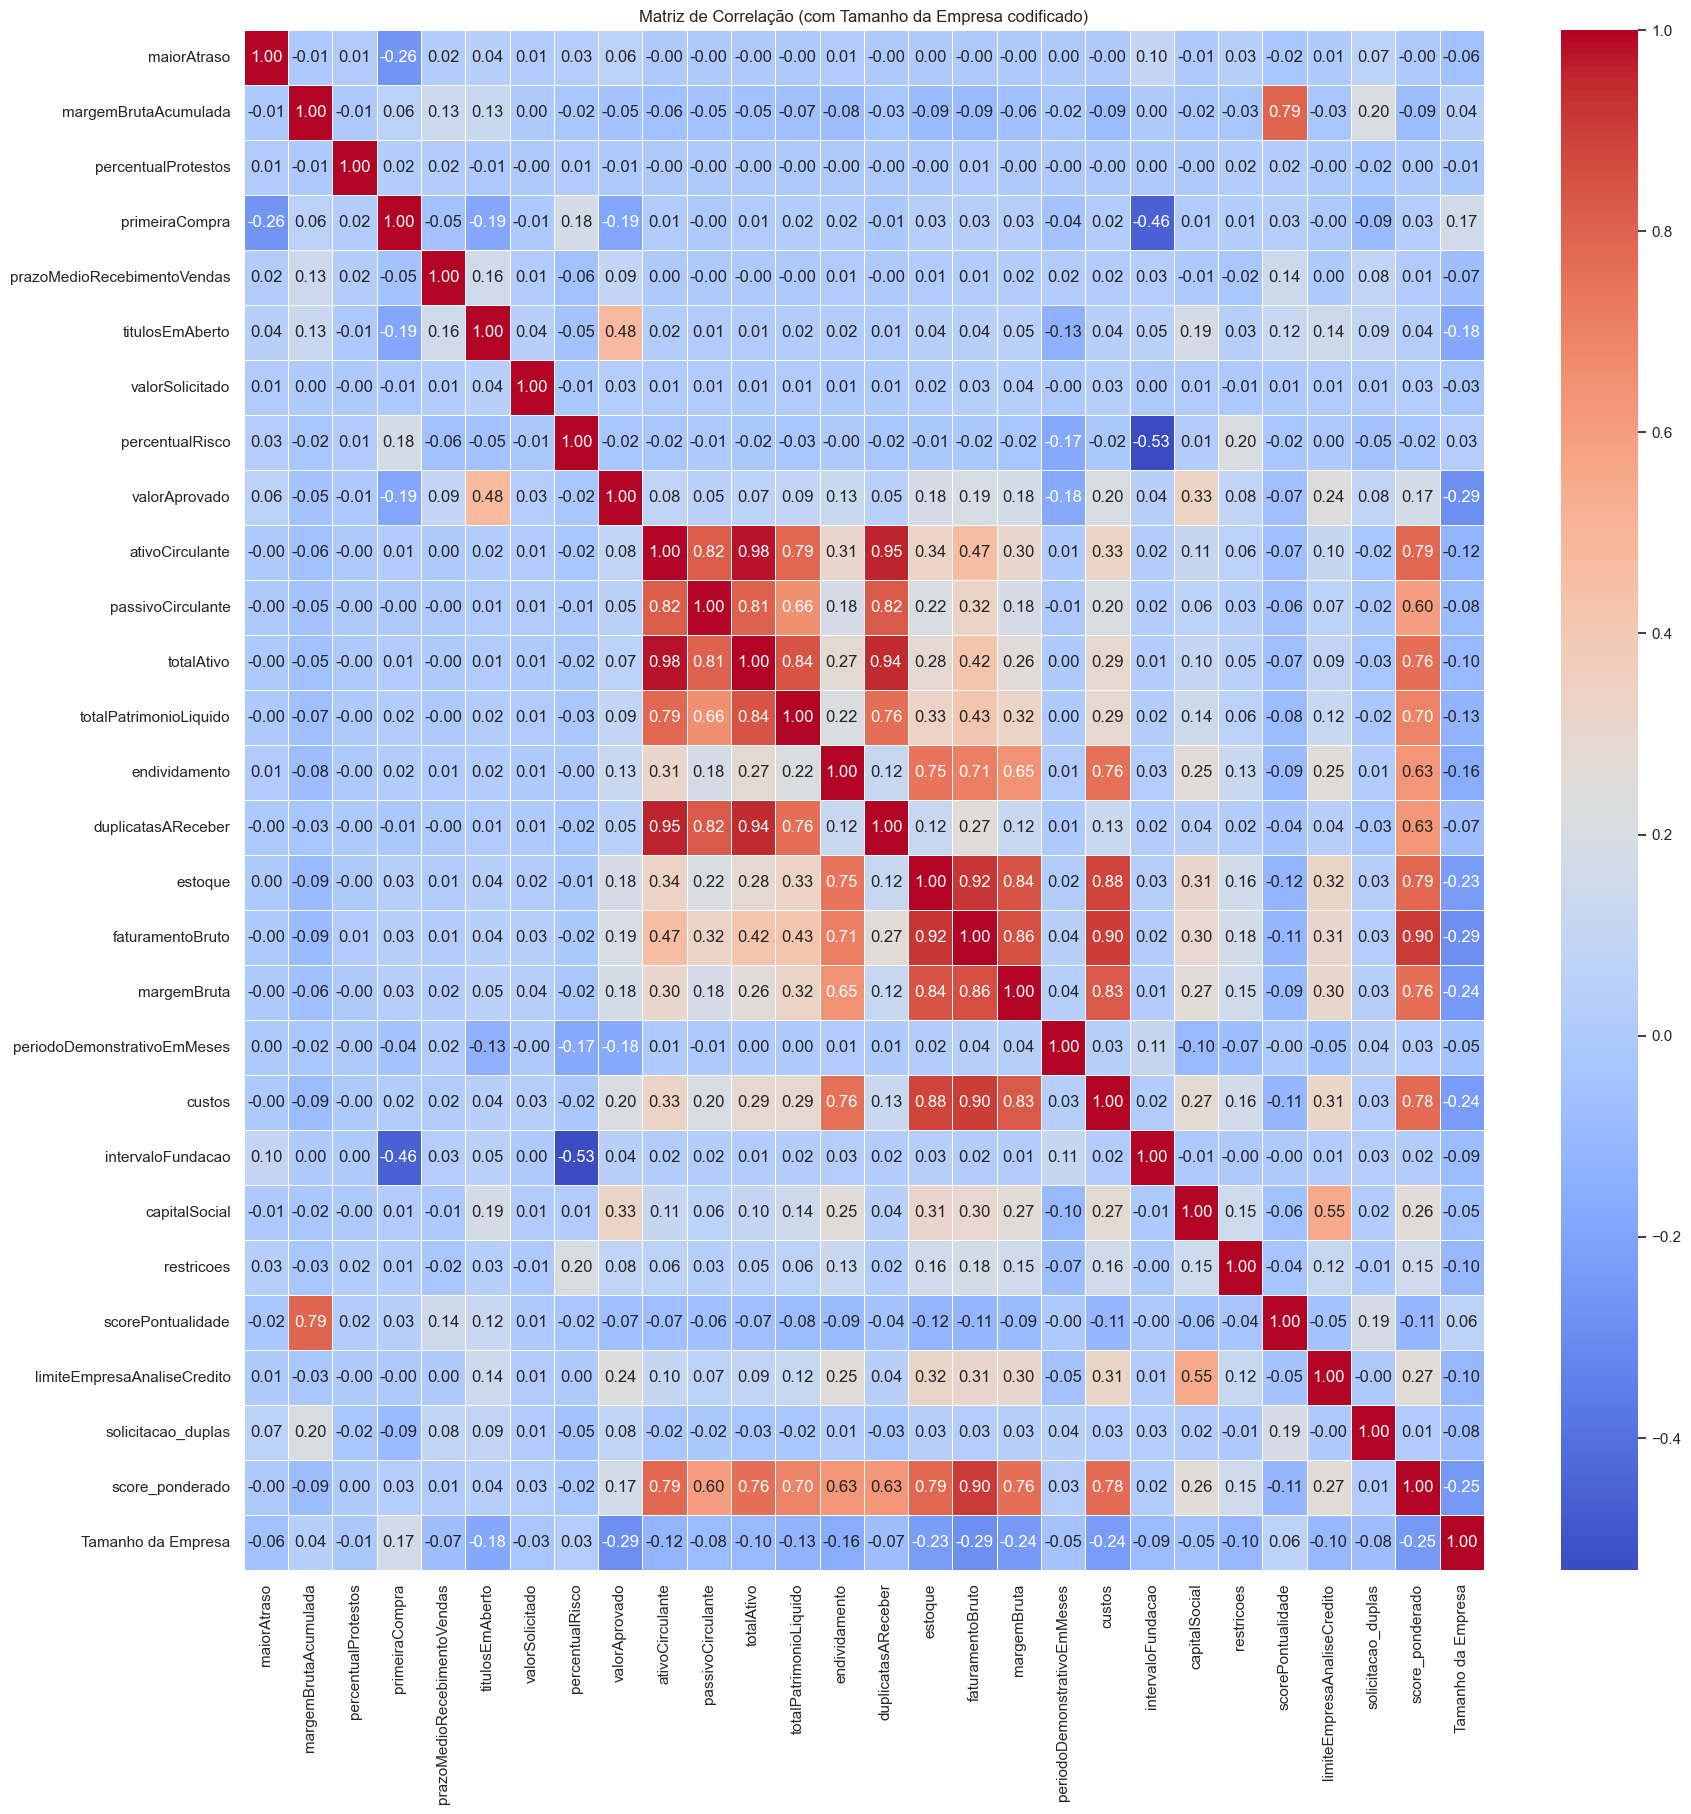

In [104]:
# Criando uma cópia do DataFrame para evitar modificar o original
encoded_df = sub_df.copy()

# Aplicando Label Encoding na coluna 'Tamanho da Empresa'
label_encoder = LabelEncoder()
encoded_df['Tamanho da Empresa'] = label_encoder.fit_transform(encoded_df['Tamanho da Empresa'])

# colunas numéricas
numeric_columns_encoded = encoded_df.select_dtypes(include=np.number)

# Calculando a matriz de correlação
correlation_matrix_encoded = numeric_columns_encoded.corr()

# Visualizar em gráfico matriz de correlação
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix_encoded, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação (com Tamanho da Empresa codificado)')
plt.show()


## ***Modelos de Classificação***

### *Imports necessários*

In [105]:
# Importa a classe RandomForestClassifier para classificação RandomForest
from sklearn.ensemble import RandomForestClassifier

# Importa a função train_test_split para dividir os dados em conjuntos de treinamento e teste
from sklearn.model_selection import train_test_split

# Importa a função accuracy_score para calcular a acurácia do modelo de classificação
from sklearn.metrics import accuracy_score

### *Coletando os dados*

In [106]:
# Selecionando colunas de entrada e saida
# Atribuindo a coluna 'Tamanho da Empresa' ao Y
Y = sub_df['Tamanho da Empresa']

# Atribuindo as outras colunas ao X
X = sub_df[['margemBrutaAcumulada', 'faturamentoBruto', 'valorAprovado', 'ativoCirculante', 'totalAtivo', 'totalPatrimonioLiquido', 'scorePontualidade', 'percentualRisco']]

### *Separação de Treino e Teste*

In [107]:
# Dividindo os dados em conjuntos de treinamento e teste (80% treinamento, 20% teste)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Exibindo o tamanho dos conjuntos de treinamento e teste
print("Tamanho do conjunto de treinamento:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)

Tamanho do conjunto de treinamento: (7178, 8)
Tamanho do conjunto de teste: (1795, 8)


### *Treinamento do Modelo*

In [108]:
# Modelo => RandomForest
# Cria o classificar RandomForest
model = RandomForestClassifier()

# Cria o modelo de machine learning
model.fit(X_train, Y_train)


RandomForestClassifier()

### *Predições do modelo*

In [109]:
# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Exibindo previsoes
y_pred

array(['MEI / ME / EPP', 'Grande Empresa', 'MEI / ME / EPP', ...,
       'Média Empresa', 'Corporação', 'Grande Empresa'], dtype=object)

### *Métricas - Acurácia*

In [110]:
accuracy = accuracy_score(Y_test, y_pred)
print("Acerto médio de classificação: ", accuracy)

Acerto médio de classificação:  0.886908077994429


### *Predições fora das amostras do dataset*

In [111]:
# Valores fictícios para as entradas
dados_valores = {
    'margemBrutaAcumulada': [0.7552448],
    'faturamentoBruto' : [8946880.0],
    'valorAprovado': [50758917.0],
    'ativoCirculante': [0.0],
    'totalAtivo': [1215487.0],
    'totalPatrimonioLiquido': [1000],
    'scorePontualidade': [1.0],
    'percentualRisco' : [0.283019]
}

# Criando DataFrame
valores_df = pd.DataFrame(dados_valores)


In [112]:
# Faça a previsão usando o modelo
previsao = model.predict(valores_df)

# Exibindo previsão
print("A previsão do Tamanho da Empresa é de ", previsao)

A previsão do Tamanho da Empresa é de  ['Grande Empresa']
